In [1]:
import numpy as np
# Importing standard Qiskit libraries
import qiskit
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, QuantumRegister, ClassicalRegister
from numpy import pi
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [2]:
reg_p = QuantumRegister(1, 'p')
reg_h = QuantumRegister(1, 'h')
reg_e = QuantumRegister(1, 'e')
reg_n = QuantumRegister(1, 'n')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(reg_p, reg_h, reg_e, reg_n, creg_c)

#rotation
circuit.ry(pi/4, reg_p)

#U_count
circuit.cx(reg_p, reg_n)

In [3]:
#did any emissions occur?
circuit.cx(reg_e, reg_n)

In [4]:
#u_h
circuit.ccx(reg_p, reg_e, reg_h)
circuit.cx(reg_e, reg_n)

In [5]:
#u_p
circuit.cx(reg_p, reg_h)

In [6]:
#rotation
circuit.ry((3/4)*pi, reg_p)

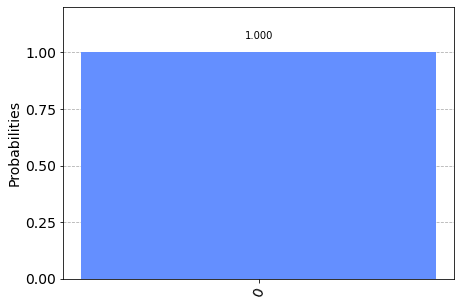

In [7]:
backend = qiskit.Aer.get_backend('statevector_simulator')
job = qiskit.execute(circuit, backend)
result = job.result()
counts = result.get_counts(circuit)
graph = qiskit.visualization.plot_histogram(counts)

display(graph)

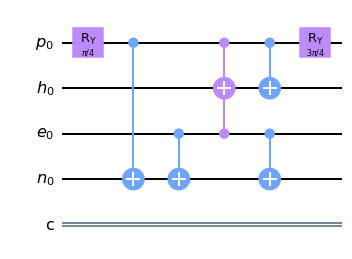

In [8]:
circuit.draw()